In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

Matplotlib created a temporary cache directory at /tmp/matplotlib-py2zunph because the default path (/ephemeral/yaya/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
data_dir = "/ephemeral/yaya/projects/watermark-analysis/data/blackbox_categorization"
output_dir = "/ephemeral/yaya/projects/watermark-analysis/data/fft"

In [3]:
def fft(image):
    # fft then shift then take the magnitude
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum

In [6]:
# use os.walk
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".png"):
            image_path = os.path.join(root, file)
            image = Image.open(image_path)
            image = image.convert('L')
            image = np.array(image)
            magnitude_spectrum = fft(image)
           # create an out_dir with same structure as data_dir
            out_dir = os.path.join(output_dir, ,os.path.relpath(root, data_dir))
            os.makedirs(out_dir, exist_ok=True)
            out_path = os.path.join(out_dir, file)
            plt.imsave(out_path, magnitude_spectrum, cmap='inferno')
            print(f"saved {out_path}")

saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/81.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/152.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/56.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/99.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/107.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/65.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/25.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/79.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/126.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/140.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/124.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/64.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/50.png
saved /ephemeral/yaya/projects/watermark-analysis/data/fft/all/287.png
saved /ephemer

KeyboardInterrupt: 

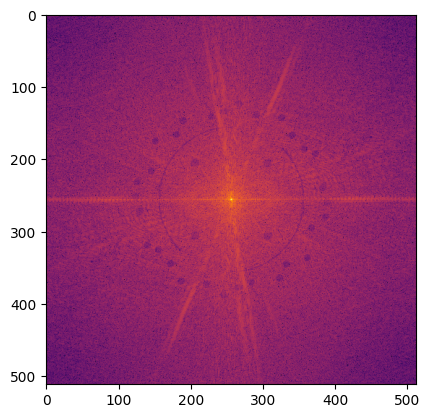

In [14]:
import cv2
import random
out = '/ephemeral/yaya/projects/watermark-analysis/data/fft/all'
paths = glob('/ephemeral/yaya/projects/watermark-analysis/data/fft/*/*')
image = Image.open(random.choice(paths))
plt.imshow(image)

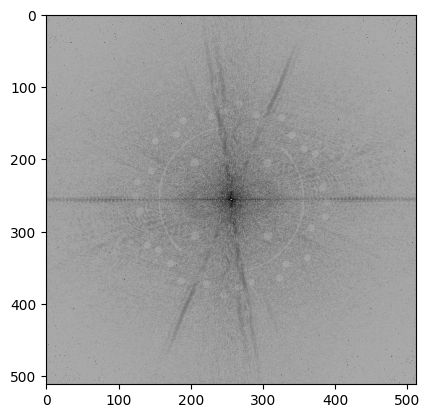

In [42]:
plt.imshow(array_image[:,:,2], cmap='gray')

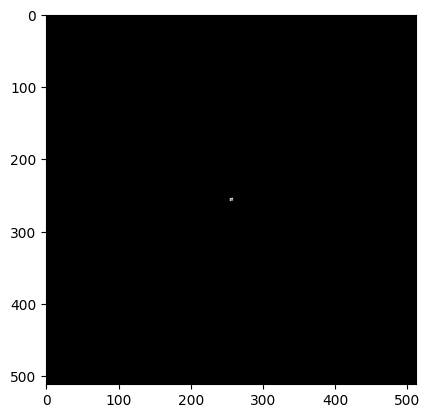

In [44]:
# apply blur
# array_image = np.array(image)
# print(array_image.shape)
# blur = cv2.GaussianBlur(array_image, (3,3), 0)#
#convert to grayscale
gray = cv2.cvtColor(array_image, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, 1, 200)
#plot
plt.imshow(edge, cmap='gray')